# Factors Influencing EV Purchases

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px
import plotly.graph_objects as go

plt.style.use('ggplot')
plt.rcParams["figure.figsize"] = (15,10)

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
import datetime  # to access datetime

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# import data
Vehicle_data=pd.read_excel('/content/drive/MyDrive/Colab Notebooks/DSO545 final project/Total EV data.xlsx',sheet_name='2023 Vehicle Registrated Counts')
Law_data=pd.read_excel('/content/drive/MyDrive/Colab Notebooks/DSO545 final project/Total EV data.xlsx',sheet_name='Laws and Incentives')
Chargers_data=pd.read_excel('/content/drive/MyDrive/Colab Notebooks/DSO545 final project/Total EV data.xlsx',sheet_name='Chargers')
Income_data=pd.read_excel('/content/drive/MyDrive/Colab Notebooks/DSO545 final project/Total EV data.xlsx',sheet_name='Income')
Greenest_data=pd.read_excel('/content/drive/MyDrive/Colab Notebooks/DSO545 final project/Total EV data.xlsx',sheet_name='Greenest')

In [ ]:
# caculate EV proportion: EV/Total
Vehicle_data['Total Vehicle'] = Vehicle_data.iloc[:, 1:12].sum(axis=1)
Vehicle_data['total EV percentage (%)'] = ((Vehicle_data['Electric (EV)'] +  Vehicle_data['Plug-In Hybrid Electric (PHEV)'] + Vehicle_data['Hybrid Electric (HEV)'])/ Vehicle_data['Total Vehicle'])*100
Vehicle_data.head()

,State,Electric (EV),Plug-In Hybrid Electric (PHEV),Hybrid Electric (HEV),Biodiesel,Ethanol/Flex (E85),Compressed Natural Gas (CNG),Propane,Hydrogen,Methanol,Gasoline,Diesel,Unknown Fuel,Total Vehicle,total EV percentage (%)
0,Alabama,13000,5800,63300,54200,441200,100,100,0,0,4102200,127000,29000,4806900,1.707961
1,Alaska,2700,900,10600,9600,46800,0,0,0,0,454300,29800,5100,554700,2.559942
2,Arizona,89800,25600,175700,68600,437100,600,700,0,0,5469000,197700,64200,6464800,4.502846
3,Arkansas,7100,3200,37000,37000,276700,200,0,0,0,2246100,90700,10300,2698000,1.753150
4,California,1256600,410700,1703200,201600,1314600,10100,1500,16900,0,31191900,735300,7900,36842400,9.148427


In [ ]:
# create a new data set for regression
Total_data = Vehicle_data[['State', 'Total Vehicle', 'total EV percentage (%)']]
Total_data.head()

,State,Total Vehicle,total EV percentage (%)
0,Alabama,4806900,1.707961
1,Alaska,554700,2.559942
2,Arizona,6464800,4.502846
3,Arkansas,2698000,1.753150
4,California,36842400,9.148427


In [ ]:
# data set for regression (adding law and incentive data)
Total_data = Total_data.merge(Law_data, on = 'State')
Total_data.head()

,State,Total Vehicle,total EV percentage (%),Incentive for Charger,Incentive for EV Purchase,Electric Vehicle Laws and Incentives
0,Alabama,4806900,1.707961,1,0,8
1,Alaska,554700,2.559942,1,1,4
2,Arizona,6464800,4.502846,1,0,16
3,Arkansas,2698000,1.753150,1,0,10
4,California,36842400,9.148427,1,1,99


In [ ]:
# data set for regression (adding charger data)
Total_data = Total_data.merge(Chargers_data[['State','EV charging ports']], on = 'State')
Total_data.head()

,State,Total Vehicle,total EV percentage (%),Incentive for Charger,Incentive for EV Purchase,Electric Vehicle Laws and Incentives,EV charging ports
0,Alabama,4806900,1.707961,1,0,8,1294
1,Alaska,554700,2.559942,1,1,4,139
2,Arizona,6464800,4.502846,1,0,16,4025
3,Arkansas,2698000,1.753150,1,0,10,892
4,California,36842400,9.148427,1,1,99,48369


In [ ]:
# data set for regression (adding income data)
Total_data = Total_data.merge(Income_data[['State','Median income (dollars)','Mean income (dollars)']], on = 'State')
Total_data.head()

,State,Total Vehicle,total EV percentage (%),Incentive for Charger,Incentive for EV Purchase,Electric Vehicle Laws and Incentives,EV charging ports,Median income (dollars),Mean income (dollars)
0,Alabama,4806900,1.707961,1,0,8,1294,62212,85530
1,Alaska,554700,2.559942,1,1,4,139,86631,114201
2,Arizona,6464800,4.502846,1,0,16,4025,77315,104620
3,Arkansas,2698000,1.753150,1,0,10,892,58700,81056
4,California,36842400,9.148427,1,1,99,48369,95521,134491


In [ ]:
# data set for regression (adding eco friendly data)
Greenest_data.columns = Greenest_data.columns.str.strip()
Total_data = Total_data.merge(Greenest_data[['State','Total Score']], on = 'State')
Total_data.head()

,State,Total Vehicle,total EV percentage (%),Incentive for Charger,Incentive for EV Purchase,Electric Vehicle Laws and Incentives,EV charging ports,Median income (dollars),Mean income (dollars),Total Score
0,Alabama,4806900,1.707961,1,0,8,1294,62212,85530,36.45
1,Alaska,554700,2.559942,1,1,4,139,86631,114201,39.04
2,Arizona,6464800,4.502846,1,0,16,4025,77315,104620,53.22
3,Arkansas,2698000,1.753150,1,0,10,892,58700,81056,46.62
4,California,36842400,9.148427,1,1,99,48369,95521,134491,75.75


In [ ]:
# rename
Total_data = Total_data.rename(columns={'total EV percentage (%)': 'EV proportion', 'Incentive for EV Purchase':'Incentive for purchase', 'EV charging ports':'Chargers', 'Median income (dollars)':'Income', 'Total Score':'Environmentally Friendly'})
Total_data.head()

,State,Total Vehicle,EV proportion,Incentive for Charger,Incentive for purchase,Electric Vehicle Laws and Incentives,Chargers,Income,Mean income (dollars),Environmentally Friendly
0,Alabama,4806900,1.707961,1,0,8,1294,62212,85530,36.45
1,Alaska,554700,2.559942,1,1,4,139,86631,114201,39.04
2,Arizona,6464800,4.502846,1,0,16,4025,77315,104620,53.22
3,Arkansas,2698000,1.753150,1,0,10,892,58700,81056,46.62
4,California,36842400,9.148427,1,1,99,48369,95521,134491,75.75


In [ ]:
# Descriptive statistics
Total_data.describe().round(2)

,Total Vehicle,EV proportion,Incentive for Charger,Incentive for purchase,Electric Vehicle Laws and Incentives,Chargers,Income,Mean income (dollars),Environmentally Friendly
count,50.00,50.00,50.00,50.00,50.00,50.00,50.00,50.00,50.00
mean,5701818.00,3.55,0.84,0.42,18.20,3814.04,76976.48,104305.30,57.79
std,6471793.16,1.67,0.37,0.50,15.41,7130.01,12262.20,16347.23,12.53
min,554700.00,1.25,0.00,0.00,4.00,139.00,54203.00,76305.00,22.38
25%,1932875.00,2.46,1.00,0.00,8.25,791.25,69256.50,93570.25,50.93
50%,4129100.00,3.06,1.00,0.00,14.50,1721.00,74631.50,101923.00,59.82
75%,6702325.00,4.46,1.00,1.00,22.00,4307.50,85057.50,113974.00,68.23
max,36842400.00,9.15,1.00,1.00,99.00,48369.00,99858.00,138516.00,75.75


In [ ]:
# regression
import statsmodels.api as sm
var = ['Electric Vehicle Laws and Incentives','Incentive for Charger', 'Incentive for purchase', 'Chargers', 'Income', 'Environmentally Friendly']
x=Total_data[var]
y=Total_data['EV proportion']
x=sm.add_constant(x)
model=sm.OLS(y,x,missing='drop')
results=model.fit()
results.params
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:          EV proportion   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     36.51
Date:                Mon, 09 Dec 2024   Prob (F-statistic):           2.50e-15
Time:                        00:54:23   Log-Likelihood:                -50.960
No. Observations:                  50   AIC:                             115.9
Df Residuals:                      43   BIC:                             129.3
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------


In [ ]:
# find states with high income
Total_data.sort_values(by='Income', ascending=False).head(10)

,State,Total Vehicle,EV proportion,Incentive for Charger,Incentive for purchase,Electric Vehicle Laws and Incentives,Chargers,Income,Mean income (dollars),Environmentally Friendly
20,Massachusetts,5461100,5.583124,1,1,38,8064,99858,138516,69.69
29,New Jersey,7287700,4.801240,1,1,34,4359,99781,138153,60.42
19,Maryland,5028500,5.411156,1,1,27,4906,98678,129366,74.35
28,New Hampshire,1371400,3.886539,1,1,13,685,96838,124500,63.63
4,California,36842400,9.148427,1,1,99,48369,95521,134491,75.75
10,Hawaii,1076400,6.438127,1,0,19,794,95322,124713,70.36
46,Washington,6769400,7.393565,1,1,45,6148,94605,129161,72.90
43,Utah,3050200,4.465281,1,0,17,2510,93421,117752,61.49
5,Colorado,5395300,5.195263,1,1,44,5470,92911,124578,67.61
6,Connecticut,2924800,4.284054,1,1,30,3469,91665,131007,69.83


In [ ]:
# find eco friendly states
Total_data.sort_values(by='Environmentally Friendly', ascending=False).head(10)

,State,Total Vehicle,EV proportion,Incentive for Charger,Incentive for purchase,Electric Vehicle Laws and Incentives,Chargers,Income,Mean income (dollars),Environmentally Friendly
4,California,36842400,9.148427,1,1,99,48369,95521,134491,75.75
44,Vermont,588100,5.747322,1,1,27,1107,81211,105931,74.75
31,New York,11239500,4.783131,1,1,28,15513,82095,122227,74.67
19,Maryland,5028500,5.411156,1,1,27,4906,98678,129366,74.35
46,Washington,6769400,7.393565,1,1,45,6148,94605,129161,72.90
22,Minnesota,5094000,3.488418,1,1,15,2296,85086,113293,70.51
10,Hawaii,1076400,6.438127,1,0,19,794,95322,124713,70.36
18,Maine,1228100,3.957332,0,1,19,1131,73733,97157,70.10
6,Connecticut,2924800,4.284054,1,1,30,3469,91665,131007,69.83
20,Massachusetts,5461100,5.583124,1,1,38,8064,99858,138516,69.69


# Tesla performance

In [ ]:
# imput data
sales = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/DSO545 final project/sales_2011_2019.xlsx',sheet_name='sales per year')
sales.head()

,Vehicle,Brand,Type,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Chevy Volt,Chevrolet,PHEV,7671,23461,23094,18805,15393,24739,20349,18306,4915
1,Nissan Leaf,Nissan,EV,9674,9819,22610,30200,17269,14006,11230,14715,12365
2,Smart ED,Smart,EV,342,139,923,2594,1387,657,544,1219,680
3,Mitsubishi I EV,Mitsubishi,EV,76,588,1029,196,115,94,6,0,0
4,BMW Active E,BMW,EV,0,673,0,0,0,0,0,0,0


In [ ]:
# understand the sales amount for each brand by year
sales_melted = sales.melt(id_vars=['Vehicle', 'Brand', 'Type'],
                          value_vars=[year for year in range(2011, 2020)],
                          var_name='Year', value_name='Sales Amount')

fig = px.bar(sales_melted,
             x='Year',
             y='Sales Amount',
             color='Brand',
             barmode='group',
             labels={'Sales Amount': 'Sales Amount ($)', 'Year': 'Year'},
             title='Sales Amount by Brand (2011-2019)')
fig.show()

In [ ]:
from google.colab import files

uploaded = files.upload()


Saving EV_cars.csv to EV_cars.csv
Saving sales_by_country.csv to sales_by_country.csv
Saving ofm_april1_population_final.xlsx to ofm_april1_population_final.xlsx
Saving Electric_Vehicle_Population_Size_History_By_County (1).csv to Electric_Vehicle_Population_Size_History_By_County (1).csv
Saving Electric_Vehicle_Population_Data (2).csv to Electric_Vehicle_Population_Data (2).csv


# Battery Vehicle Sales and Supply Chain

In [ ]:
from google.colab import files

uploaded = files.upload()


Saving lithium-production.csv to lithium-production (1).csv
Saving share-car-sales-battery-plugin.csv to share-car-sales-battery-plugin (2).csv


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = "share-car-sales-battery-plugin.csv"
data = pd.read_csv(file_path)
data.head()

,Entity,Code,Year,Plug-in hybrid as a share of cars sold,Battery-electric as a share of cars sold
0,Australia,AUS,2012,0.009600,0.020400
1,Australia,AUS,2013,0.011724,0.022276
2,Australia,AUS,2014,0.115152,0.044848
3,Australia,AUS,2015,0.113636,0.086364
4,Australia,AUS,2016,0.076642,0.073358


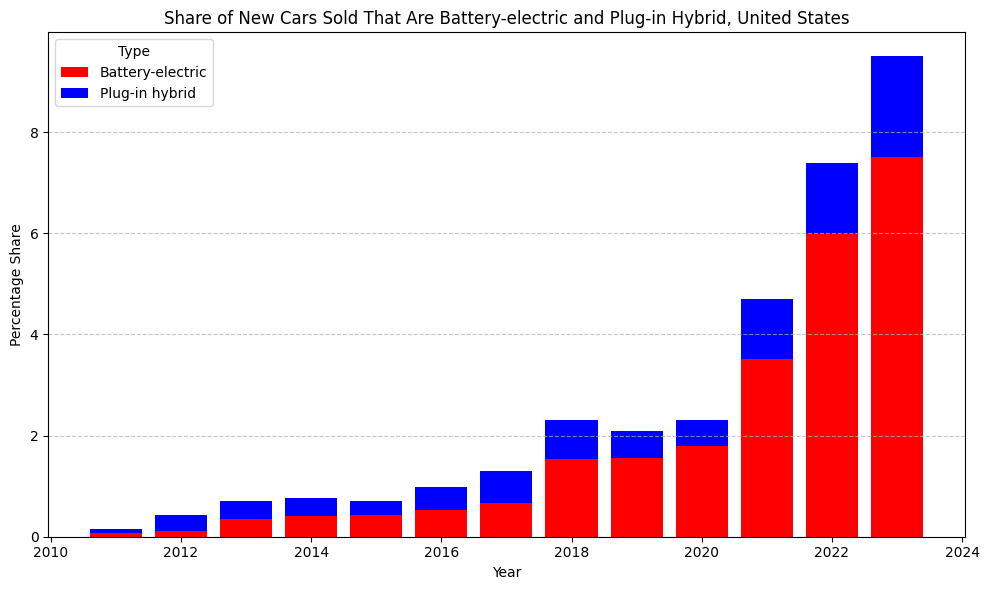

In [ ]:
file_path = "share-car-sales-battery-plugin.csv"
data = pd.read_csv(file_path)

us_data = data[data['Entity'] == 'United States']

plt.figure(figsize=(10, 6))
plt.bar(us_data['Year'], us_data['Battery-electric as a share of cars sold'],
        label='Battery-electric', color='red')
plt.bar(us_data['Year'], us_data['Plug-in hybrid as a share of cars sold'],
        bottom=us_data['Battery-electric as a share of cars sold'],
        label='Plug-in hybrid', color='blue')

plt.title("Share of New Cars Sold That Are Battery-electric and Plug-in Hybrid, United States")
plt.xlabel("Year")
plt.ylabel("Percentage Share")
plt.legend(title="Type")
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()



In [ ]:
import pandas as pd
import plotly.express as px

file_path = "lithium-production.csv"  # Update with your file path
data = pd.read_csv(file_path)
data.head()

,Entity,Code,Year,Lithium production - kt
0,Africa,NaN,1995,520.0
1,Africa,NaN,1996,500.0
2,Africa,NaN,1997,700.0
3,Africa,NaN,1998,1000.0
4,Africa,NaN,1999,700.0


In [ ]:
# Filter data for the year 2023
data_2023 = data[data['Year'] == 2023].copy()

# Ensure values are in tonnes instead of kilotonnes
data_2023['Lithium production - tonnes'] = data_2023['Lithium production - kt'] * 1000

# Create the choropleth map
fig = px.choropleth(
    data_2023,
    locations="Entity",
    locationmode="country names",
    color="Lithium production - tonnes",
    hover_name="Entity",
    title="Lithium Production, 2023 (in tonnes)",
    color_continuous_scale="Blues",
    labels={"Lithium production - tonnes": "Lithium Production (tonnes)"}
)

# Customize map layout
fig.update_geos(
    showcoastlines=True,
    coastlinecolor="Black",
    projection_type="equirectangular"
)
fig.update_layout(title_x=0.5)

# Show the map
fig.show()


# Rise of Competition

In [ ]:
import pandas as pd
df = pd.read_excel('Model_Price.xlsx')


In [ ]:
df.head()

,Make and model,Range,Base Price (MSRP),Price Per Mile of Range,Vehicle Type
0,Audi E-Tron GT,249,"$106,500",$428,Sedan
1,"Audi Q4 E-Tron SUV, Sportback",258,"$58,200",$226,SUV
2,Audi Q8 e-tron,285,"$74,400",$261,SUV
3,BMW i4,276,"$52,200",$189,Sedan
4,BMW i5,266,"$66,800",$251,Sedan


In [ ]:
df['Range'] = pd.to_numeric(df['Range'], errors='coerce')
df['Base Price (MSRP)'] = df['Base Price (MSRP)'].replace('[\$,]', '', regex=True).astype(float)
df['Price Per Mile of Range'] = df['Price Per Mile of Range'].replace('[\$,]', '', regex=True).astype(float)

In [ ]:
statistics = {
    'Mean': df['Price Per Mile of Range'].mean(),
    'Median': df['Price Per Mile of Range'].median(),
    'Standard Deviation': df['Price Per Mile of Range'].std(),
    'Range': df['Price Per Mile of Range'].max() - df['Price Per Mile of Range'].min()
}

In [ ]:
model_stats = df.groupby('Make and model')['Price Per Mile of Range'].describe()
best_value_model = df.loc[df['Price Per Mile of Range'].idxmin(), 'Make and model']
print("Basic Statistics for Price Per Mile of Range across Models:")
print(f"Mean: ${statistics['Mean']:.2f}")
print(f"Median: ${statistics['Median']:.2f}")
print(f"Standard Deviation: ${statistics['Standard Deviation']:.2f}")
print(f"Range: ${statistics['Range']:.2f}")

print("\nStatistics for each model:")
print(model_stats)

print(f"\nThe most cost-efficient model (lowest Price Per Mile of Range) is: {best_value_model}")

Basic Statistics for Price Per Mile of Range across Models:
Mean: $258.69
Median: $212.00
Standard Deviation: $191.18
Range: $1337.00

Statistics for each model:
                               count   mean  std    min    25%    50%    75%  \
Make and model                                                                 
Audi E-Tron GT                   1.0  428.0  NaN  428.0  428.0  428.0  428.0   
Audi Q4 E-Tron SUV, Sportback    1.0  226.0  NaN  226.0  226.0  226.0  226.0   
Audi Q8 e-tron                   1.0  261.0  NaN  261.0  261.0  261.0  261.0   
BMW i4                           1.0  189.0  NaN  189.0  189.0  189.0  189.0   
BMW i5                           1.0  251.0  NaN  251.0  251.0  251.0  251.0   
...                              ...    ...  ...    ...    ...    ...    ...   
Volkswagen ID 4 Pro              1.0  154.0  NaN  154.0  154.0  154.0  154.0   
Volvo C40 Recharge               1.0  185.0  NaN  185.0  185.0  185.0  185.0   
Volvo EX30                       1.0  

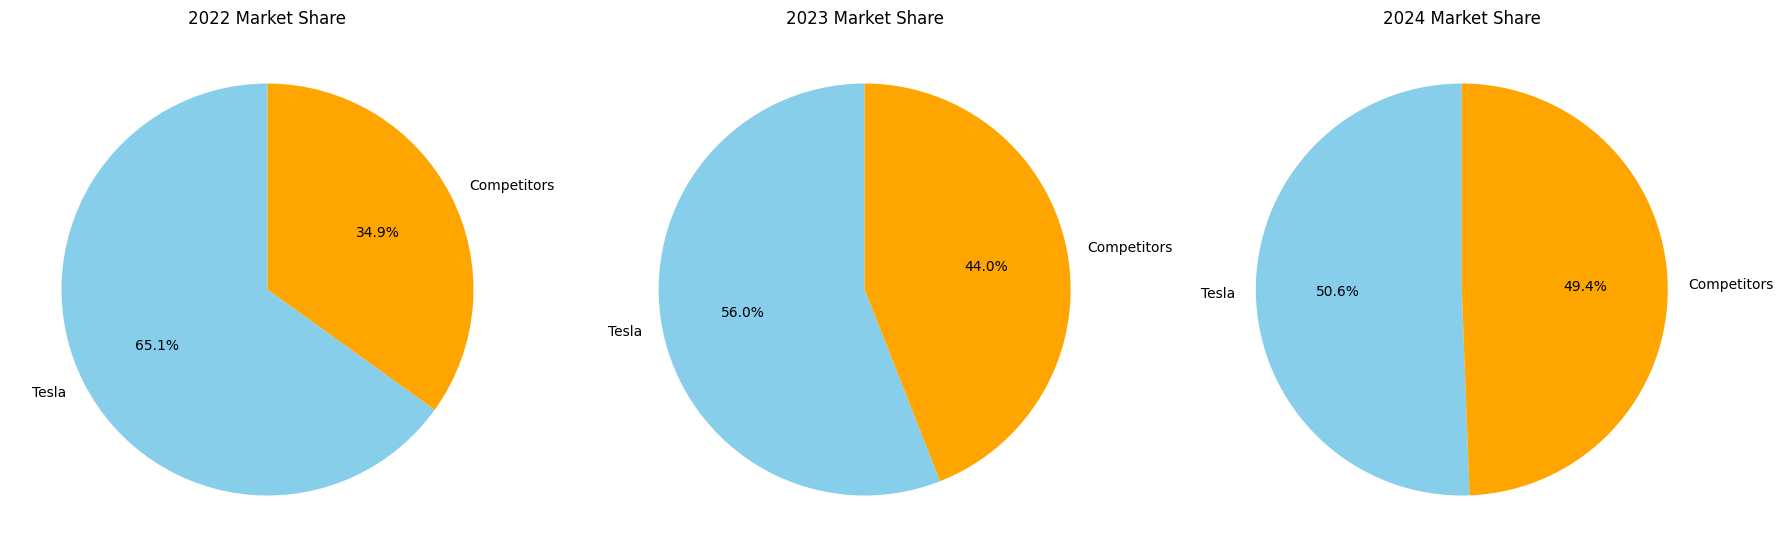

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_excel('EVMarketShare.xlsx')


# Clean the column names
df.columns = df.columns.str.strip()

# Define quarter columns for each year
quarters_2022 = ['Q1 2022', 'Q2 2022', 'Q3 2022', 'Q4 2022']
quarters_2023 = ['Q1 2023', 'Q2 2023', 'Q3 2023', 'Q4 2023']
quarters_2024 = ['Q1 2024', 'Q2 2024', 'Q3 2024']

# Calculate market share for Tesla and competitors for each year
tesla_2022 = df.loc[df['Automaker'] == 'Tesla', quarters_2022].sum(axis=1).values[0]
tesla_2023 = df.loc[df['Automaker'] == 'Tesla', quarters_2023].sum(axis=1).values[0]
tesla_2024 = df.loc[df['Automaker'] == 'Tesla', quarters_2024].sum(axis=1).values[0]

competitors_2022 = df.loc[df['Automaker'] != 'Tesla', quarters_2022].sum(axis=0).sum()
competitors_2023 = df.loc[df['Automaker'] != 'Tesla', quarters_2023].sum(axis=0).sum()
competitors_2024 = df.loc[df['Automaker'] != 'Tesla', quarters_2024].sum(axis=0).sum()

# Data for pie charts
data_2022 = [tesla_2022, competitors_2022]
data_2023 = [tesla_2023, competitors_2023]
data_2024 = [tesla_2024, competitors_2024]
labels = ['Tesla', 'Competitors']
colors = ['skyblue', 'orange']

# Plotting side-by-side pie charts
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Pie chart for 2022
axes[0].pie(data_2022, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)
axes[0].set_title('2022 Market Share')

# Pie chart for 2023
axes[1].pie(data_2023, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)
axes[1].set_title('2023 Market Share')

# Pie chart for 2024
axes[2].pie(data_2024, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)
axes[2].set_title('2024 Market Share')

# Adjust layout
plt.tight_layout()
plt.show()




```
# This is formatted as code
```

# Elon Musk Data

In [ ]:
''' create a line plot to show what proportion of democrats, republicans,
and the general public support Tesla over the last year'''

import plotly.graph_objects as go

#add data from civicscience.com
months = ["January", "February", "March", "April", "May", "June", "July"]
us_gen_pop = [30, 23, 23, 20, 19, 20, 22]
democrats = [39, 26, 26, 24, 26, 23, 18]
republicans = [36, 24, 28, 21, 19, 22, 22]


fig = go.Figure()

# add plot for general public in green
fig.add_trace(go.Scatter(
    x=months, y=us_gen_pop, mode="lines+markers+text",
    name="U.S. Gen Pop", line=dict(color="green"), text=[f"{v}%" for v in us_gen_pop],
    textposition="top center"
))

# add plot for deomcrats in blue
fig.add_trace(go.Scatter(
    x=months, y=democrats, mode="lines+markers+text",
    name="Democrats", line=dict(color="blue"), text=[f"{v}%" for v in democrats],
    textposition="top center"
))

# add plot for republicans in red
fig.add_trace(go.Scatter(
    x=months, y=republicans, mode="lines+markers+text",
    name="Republicans", line=dict(color="red"), text=[f"{v}%" for v in republicans],
    textposition="top center"
))

fig.update_layout(
    title="Favorability for Tesla by Political Leaning",
    xaxis_title="Month",
    yaxis_title="Monthly Percentages (% favorable)",
    yaxis=dict(range=[16, 40], title_font=dict(size=14)),
    xaxis=dict(title_font=dict(size=14)),
    legend=dict(title="", orientation="h", yanchor="bottom", y=1.02, xanchor="right", x=1),
    font=dict(size=12),
    plot_bgcolor="white",
    width=1000,
    height=600
)


fig.show()


In [ ]:
''' create a bar graph to display interest in Tesla among democrats, republicans,
and the general public'''

import plotly.graph_objects as go

#add data from civicscience.com
categories = ["Republicans", "General Population", "Democrats"]  # Reverse order so Democrats appear at the top
increasing = [17, 13, 14]
decreasing = [17, 29, 42]
no_opinion = [66, 58, 44]


fig = go.Figure()

# add green bar for increasing
fig.add_trace(go.Bar(
    y=categories,
    x=increasing,
    name="Increasing",
    orientation='h',
    marker=dict(color="green")
))

# add red bar for decreasing
fig.add_trace(go.Bar(
    y=categories,
    x=decreasing,
    name="Decreasing",
    orientation='h',
    marker=dict(color="red")
))

# add grey bar for no opinion
fig.add_trace(go.Bar(
    y=categories,
    x=no_opinion,
    name="No Opinion",
    orientation='h',
    marker=dict(color="gray")
))


fig.update_layout(
    barmode="stack",
    xaxis=dict(title="Percentage"),
    yaxis=dict(title=""),
    legend_title="Interest in the Brand Tesla",
    plot_bgcolor="white",
    font=dict(size=12)
)


fig.show()


In [ ]:
'''This is a T test to see if the deomcrats have a higher percentage of people with
decreasing interest in Tesla than the general public '''

import scipy.stats as stats


# Add data from civicscience.com
categories = ["Republicans", "General Population", "Democrats"]
increasing = [17, 13, 14]
decreasing = [17, 29, 42]
no_opinion = [66, 58, 44]

# Total responses for each group
total_responses = [inc + dec + no_op for inc, dec, no_op in zip(increasing, decreasing, no_opinion)]

# Proportions of "decreasing interest"
proportion_dems = decreasing[2] / total_responses[2]
proportion_genpop = decreasing[1] / total_responses[1]

# Sample sizes
n_dems = 4500
n_genpop = 17000

# Calculate standard errors for the proportions
se_dems = (proportion_dems * (1 - proportion_dems) / n_dems) ** 0.5
se_genpop = (proportion_genpop * (1 - proportion_genpop) / n_genpop) ** 0.5

# Calculate the test statistic (z-score for proportions)
se_diff = (se_dems**2 + se_genpop**2) ** 0.5
z_stat = (proportion_dems - proportion_genpop) / se_diff

# Calculate the p-value (two-tailed test)
p_value = 2 * stats.norm.sf(abs(z_stat))

# Output results
print(f'Z-stat: {z_stat}, P-value: {p_value}')




Z-stat: 15.972263957380203, P-value: 1.9941444918381808e-57


# Data for Washington State

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

total=pd.read_excel('/content/drive/MyDrive/Colab Notebooks/DSO545 final project/total.xlsx')

<Axes: xlabel='Income', ylabel='Ratio'>

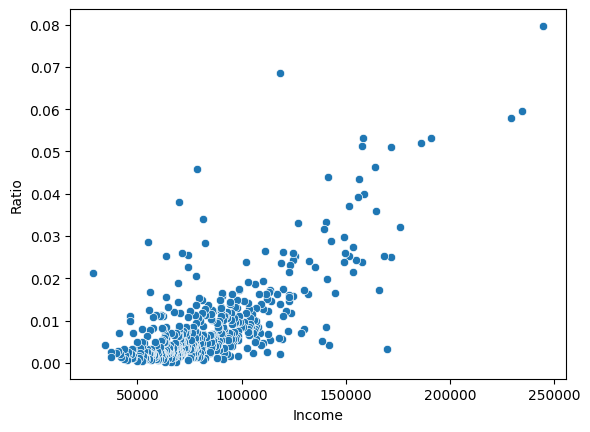

In [ ]:
# Plot the relationship between income level and EV holding ratio

sns.scatterplot(data=total,x='Income',y='Ratio')

In [ ]:
# Linear regression

import statsmodels.api as sm
x = total[["Income"]]
y = total["Ratio"]
x = sm.add_constant(x)
model = sm.OLS(y, x,missing='drop')
results=model.fit()
results.params
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  Ratio   R-squared:                       0.526
Model:                            OLS   Adj. R-squared:                  0.525
Method:                 Least Squares   F-statistic:                     527.3
Date:                Sun, 08 Dec 2024   Prob (F-statistic):           4.32e-79
Time:                        23:10:53   Log-Likelihood:                 1668.6
No. Observations:                 478   AIC:                            -3333.
Df Residuals:                     476   BIC:                            -3325.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0123      0.001    -12.266      0.0

Mean Squared Error: 5.8414041041282454e-05
R² Score: 0.6048975391964985


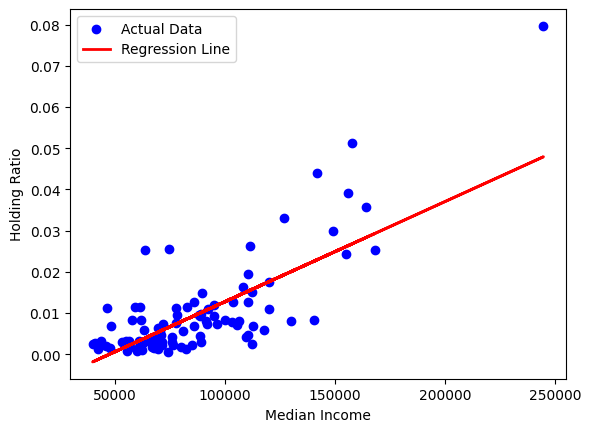

In [ ]:
# Show the linear regression figure

# Import libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Generate some example data
np.random.seed(0)
X = total[['Income']]  # Independent variable
y = total['Ratio']  # Dependent variable

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")

# Plot the results
plt.scatter(X_test, y_test, color="blue", label="Actual Data")
plt.plot(X_test, y_pred, color="red", linewidth=2, label="Regression Line")
plt.xlabel("Median Income")
plt.ylabel("Holding Ratio")
plt.legend()
plt.show()

In [ ]:
# Plot the relationship between age range and EV holding

import plotly.express as px
fig = px.box(total,x='Age',y='Holdings',color='Age',points=False,
             category_orders={"Age": ["[20,30)", "[30,40)", "[40,50)", "[50,60)", "[60,70)"]})
fig.update_layout(
    width=800,  # Set the width in pixels
    height=600  # Set the height in pixels
)
fig.show()

<Axes: xlabel='School Ratio', ylabel='Ratio'>

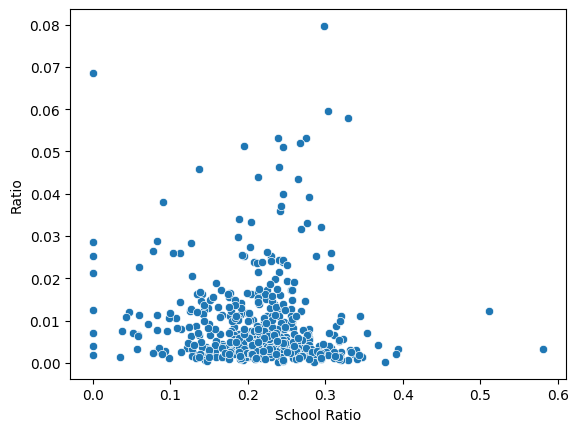

In [ ]:
# Plot the relationship between education level and EV holding ratio

sns.scatterplot(data=total,y='Ratio',x='School Ratio')

In [ ]:
# Linear regression

import statsmodels.api as sm
x = total[["School Ratio"]]
y = total["Ratio"]
x = sm.add_constant(x)
model = sm.OLS(y, x,missing='drop')
results=model.fit()
results.params
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  Ratio   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     2.307
Date:                Sun, 08 Dec 2024   Prob (F-statistic):              0.129
Time:                        23:11:41   Log-Likelihood:                 1491.5
No. Observations:                 478   AIC:                            -2979.
Df Residuals:                     476   BIC:                            -2971.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0116      0.002      7.490   

<Axes: xlabel='Family Ratio', ylabel='Ratio'>

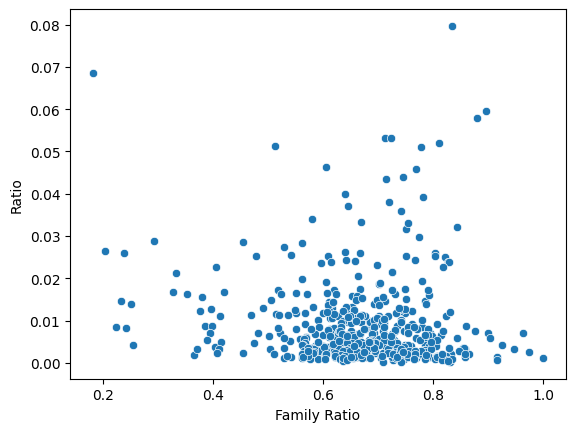

In [ ]:
# Plot the relationship between education level and EV holding ratio

sns.scatterplot(data=total,y='Ratio',x='Family Ratio')

In [ ]:
# Linear regression

import statsmodels.api as sm
x = total[["Family Ratio"]]
y = total["Ratio"]
x = sm.add_constant(x)
model = sm.OLS(y, x,missing='drop')
results=model.fit()
results.params
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  Ratio   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     2.056
Date:                Sun, 08 Dec 2024   Prob (F-statistic):              0.152
Time:                        23:11:52   Log-Likelihood:                 1491.4
No. Observations:                 478   AIC:                            -2979.
Df Residuals:                     476   BIC:                            -2970.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0132      0.003      4.913   